In [1]:
#exc1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
from itertools import compress
from collections import OrderedDict
from datetime import date
import datetime
from datetime import timedelta

In [2]:
#exc2
#Sheet nov2019_Mg_PS

#Step1: Load the Data for the month
df_nov2019_Mg_PS =  pd.read_excel(r'C:\Users\v.t.flores\Documents\Analysis_November2019_MSdataCLEAN.xlsx', sheet_name='NOV19Datetime_Mg_PS', index_col=False)

#Step2: Parse the DATETIME column
df_nov2019_Mg_PS['DATETIME'] = df_nov2019_Mg_PS['DATETIME'].apply(lambda x: parse(str(x)))

#Step3: Set the DATETIME column as the index
df_nov2019_Mg_PS.set_index('DATETIME', inplace=True)

#exc3
#Sheet 106FT02A_spcl

#Step1: Load the Data for the month
df_106FT02A_spcl =  pd.read_excel(r'C:\Users\v.t.flores\Documents\Analysis_November2019_MSdataCLEAN.xlsx', sheet_name='106FT02A_spcl', index_col=False)

#Step2: Parse the DATETIME column
df_106FT02A_spcl['DATETIME'] = df_106FT02A_spcl['DATETIME'].apply(lambda x: parse(x))

#Step3: Set the DATETIME column as the index
df_106FT02A_spcl.set_index('DATETIME', inplace=True)

#exc4
#Sheet 106FT02B_spcl

#Step1: Load the Data for the month
df_106FT02B_spcl = pd.read_excel(r'C:\Users\v.t.flores\Documents\Analysis_November2019_MSdataCLEAN.xlsx', sheet_name='106FT02B_spcl', index_col=False)

#Step2: Parse the DATETIME column
df_106FT02B_spcl['DATETIME'] = df_106FT02B_spcl['DATETIME'].apply(lambda x: parse(x))

#Step3: Set the DATETIME column as the index
df_106FT02B_spcl.set_index('DATETIME', inplace=True)

#exc5
#Sheet From Pi
#Step1: Load the Data for the month
df_nov2019Pi = pd.read_excel(r'C:\Users\v.t.flores\Documents\Analysis_November2019_MSdataCLEAN.xlsx', sheet_name='From Pi', index_col=False)

#Drop the row[1]
df_nov2019Pi = df_nov2019Pi.drop(df_nov2019Pi.index[0])

#Step2: Parse the DATETIME column
df_nov2019Pi['DATETIME'] = df_nov2019Pi['DATETIME'].apply(lambda x: parse(str(x)))

df_nov2019Pi.set_index('DATETIME', inplace=True)

#exc6
#This code merges the formatted data from the three sheets to on single dataframe named df_comb

df_com_Pi_FT02A = df_nov2019Pi.join(df_106FT02A_spcl, how='outer')
df_com_Mg_FT02B = df_nov2019_Mg_PS.join(df_106FT02B_spcl, how='outer')
df_comb = df_com_Pi_FT02A.join(df_com_Mg_FT02B, how='outer')


#exc7
#finding peaks FT for A_filtration time

df_comb['A_t_FEED'] = pd.to_numeric(df_comb['A_t_FEED'], errors='coerce')
a = np.diff(np.sign(np.diff(df_comb['A_t_FEED']))).nonzero()[0] + 1               # local min & max
b = (np.diff(np.sign(np.diff(df_comb['A_t_FEED']))) > 0).nonzero()[0] + 1         # local min
c = (np.diff(np.sign(np.diff(df_comb['A_t_FEED']))) < 0).nonzero()[0] + 1         # local max
# +1 due to the fact that diff reduces the original index number


#finding peaks FT for A_N2 Dry time

df_comb['A_t_DRY'] = pd.to_numeric(df_comb['A_t_DRY'], errors='coerce')
d = np.diff(np.sign(np.diff(df_comb['A_t_DRY']))).nonzero()[0] + 1               # local min & max
e = (np.diff(np.sign(np.diff(df_comb['A_t_DRY']))) > 0).nonzero()[0] + 1         # local min
f = (np.diff(np.sign(np.diff(df_comb['A_t_DRY']))) < 0).nonzero()[0] + 1         # local max
# +1 due to the fact that diff reduces the original index number

#Use b as the starting index and f as the ending index for one full cylcle of Filtration to N2 Drying

#-----------------------------------------------------------------------------------------------------------------------

#This code here collects the index range for the each cycle
try:
    ft_cyc_lim = {}

    for i in range(0, len(b)):
        for j in range(0, len(f)):
            if f[j] > b[i] and f[j] < b[i+1]:
                if f[j+1]<b[i+1]:
                    cyc_start = b[i]
                    cyc_end = f[j+1]
                    ft_cyc_lim.setdefault(cyc_start,cyc_end)

except IndexError:
    print('\nDone')
#------------------------------------------------------------     

print('Done', str(datetime.datetime.now()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sign
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in sign
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in sign
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in less
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in sign
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in sign
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\site-packages


Done
Done 2020-01-20 14:27:31.679368


In [3]:
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later


#code for getting the CWP for CakeWash1 and CakeWash2
##Working as of 1/15/2020
A_CWP_1new = list()
A_CWP_1new[:] = []

A_CWP_1_indexList = list()
A_CWP_1_indexList[:] = []

A_CWP_2new = list()
A_CWP_2new[:] = []

A_CWP_2_indexList = list()
A_CWP_2_indexList[:] = []

A_CWP_1_inner = list()
A_CWP_1_inner[:] = []

A_CWP_2_inner = list()
A_CWP_2_inner[:] = []

A_Pair_CWP_1_List = list()
A_Pair_CWP_2_List = list()

try:
    for i in range(0, len(keyslist)):
        A_CWPList_i = list()
        A_CWPList_i[:] = []
        d = list()
        d[:] = []
        
        A_CWPList_i = list(np.arange(keyslist[i],ft_cyc_lim[keyslist[i]]))
        d = (np.diff(np.sign(np.diff(df_comb['106FT02A_CWP'].iloc[keyslist[i]:ft_cyc_lim[keyslist[i]]])))< 0).nonzero()[0] + 1
        A_CWP_for_sort = list()
        A_CWP_for_sort[:] = [] 
        
        A_CWP_1_indexList.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
        A_CWP_2_indexList.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
        
        for i in range(0, len(d)):
            CWP_val_shortlist = df_comb['106FT02A_CWP'].iloc[A_CWPList_i[d[i]]]
            A_CWP_for_sort.append(CWP_val_shortlist)
                    
        A_CWP_1 = sorted(A_CWP_for_sort)[len(A_CWP_for_sort)-1]
        A_CWP_1_inner.append(A_CWP_1)
        
        A_CWP_2 = sorted(A_CWP_for_sort)[len(A_CWP_for_sort)-2]
        A_CWP_2_inner.append(A_CWP_2)

    A_Pair_CWP_1_List = list(zip(A_CWP_1_inner, A_CWP_1_indexList[0:]))
    A_Pair_CWP_2_List = list(zip(A_CWP_2_inner, A_CWP_2_indexList[0:]))
            
    
except IndexError:
    print('IndexError')

df_A_Pair_CWP_1 = pd.DataFrame(A_Pair_CWP_1_List)
df_A_Pair_CWP_1.columns = ['A_CWP_1', 'DATETIME']
df_A_Pair_CWP_1.set_index('DATETIME', inplace=True)
    
df_A_Pair_CWP_2 = pd.DataFrame(A_Pair_CWP_2_List)
df_A_Pair_CWP_2.columns = ['A_CWP_2', 'DATETIME']
df_A_Pair_CWP_2.set_index('DATETIME', inplace=True)
    
    
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:32.044419


In [4]:
# This code will use the index range (or limits) to create a list of values: feedtime range, cake wash time range,
# then selects the max value as the parameter value for that range

#FILTRATION TIME
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later
#For loop Dictionary names 
A_Filt_MaxList= list()
A_Filt_MaxList[:] = []
A_feedt_Val_List = list()
A_feedt_Val_List[:] = []
A_feedt_index_List = list()
A_feedt_index_List[:] = []
A_Pair_Filt_List = list()
A_Pair_Filt_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_feedt_Val_List = list()
        A_feedt_Val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):
            A_feedt = df_comb['A_t_FEED'][j]
            A_feedt_Val_List.append(A_feedt)
        A_Filt_MaxList.append(sorted(A_feedt_Val_List)[-1])
        A_feedt_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))  
    A_Pair_Filt_List = list(zip(A_Filt_MaxList, A_feedt_index_List[0:]))      
except:
    pass

df_A_Pair_Filt_t = pd.DataFrame(A_Pair_Filt_List)
df_A_Pair_Filt_t.columns = ['A_FILT_T', 'DATETIME']
df_A_Pair_Filt_t.set_index('DATETIME', inplace=True)

print('Done', str(datetime.datetime.now()))


Done 2020-01-20 14:27:32.708485


In [5]:
#MANIFOLD PRESSURE
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later
#For loop Dictionary names 
A_MANFP_MaxList = list()
A_MANFP_MaxList[:] = []
A_Pair_MANFP_List =list() 
A_Pair_MANFP_List[:] = []
A_MANFP_index_List=list()      
A_MANFP_index_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_MANFP_val_List=list() 
        A_MANFP_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            #Gets A manifold pressure of the cycle
            A_MANFP = df_comb['106FT02A_MANFP'][j]         
            A_MANFP_val_List.append(A_MANFP)
        A_MANFP_MaxList.append(sorted(A_MANFP_val_List)[-1])
        A_MANFP_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_MANFP_List = list(zip(A_MANFP_MaxList, A_MANFP_index_List[0:]))      
                        
except:
    pass

df_A_Pair_MANF_P = pd.DataFrame(A_Pair_MANFP_List)
df_A_Pair_MANF_P.columns = ['A_MANF_P', 'DATETIME']
df_A_Pair_MANF_P.set_index('DATETIME', inplace=True)

print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:33.295941


In [6]:
#CWSH1
##wORKING as of 2020.01.15

keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_t_CWSH1_Maxlist = list()
A_t_CWSH1_Maxlist[:] = []

A_CWSH1_index_List=list()      
A_CWSH1_index_List[:] = []

A_Pair_CWSH1_List =list() 
A_Pair_CWSH1_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_t_CWSH1_val_List=list() 
        A_t_CWSH1_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_t_CWSH1 = df_comb['A_t_CWSH1'][j]         
            A_t_CWSH1_val_List.append(A_t_CWSH1)
        A_t_CWSH1_Maxlist.append(sorted(A_t_CWSH1_val_List)[-1])
        A_CWSH1_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_CWSH1_List = list(zip(A_t_CWSH1_Maxlist, A_CWSH1_index_List[0:]))      
                        
except:
    pass
df_A_Pair_CWSH1 = pd.DataFrame(A_Pair_CWSH1_List)
df_A_Pair_CWSH1.columns = ['A_CWSH1', 'DATETIME']
df_A_Pair_CWSH1.set_index('DATETIME', inplace=True)

print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:33.844473


In [7]:
#CWSH2
##wORKING as of 2020.01.15
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_t_CWSH2_Maxlist = list()
A_t_CWSH2_Maxlist[:] = []

A_CWSH2_index_List=list()      
A_CWSH2_index_List[:] = []

A_Pair_CWSH2_List =list() 
A_Pair_CWSH2_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_t_CWSH2_val_List=list() 
        A_t_CWSH2_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_t_CWSH2 = df_comb['A_t_CWSH2'][j]         
            A_t_CWSH2_val_List.append(A_t_CWSH2)
        A_t_CWSH2_Maxlist.append(sorted(A_t_CWSH2_val_List)[-1])
        A_CWSH2_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_CWSH2_List = list(zip(A_t_CWSH2_Maxlist, A_CWSH2_index_List[0:]))      
                        
except:
    pass
  
df_A_Pair_CWSH2 = pd.DataFrame(A_Pair_CWSH2_List)
df_A_Pair_CWSH2.columns = ['A_CWSH2', 'DATETIME']
df_A_Pair_CWSH2.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:34.400986


In [8]:
#Pressing_1
##wORKING as of 2020.01.15
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_t_Press1_Maxlist = list()
A_t_Press1_Maxlist[:] = []

A_t_Press1_index_List=list()      
A_t_Press1_index_List[:] = []

A_Pair_A_t_Press1_List =list() 
A_Pair_A_t_Press1_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_t_Press1_val_List=list() 
        A_t_Press1_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_t_Press1 = df_comb['A_t_PRESS1'][j]         
            A_t_Press1_val_List.append(A_t_Press1)
        A_t_Press1_Maxlist.append(sorted(A_t_Press1_val_List)[-1])
        A_t_Press1_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_Press1_List = list(zip(A_t_Press1_Maxlist, A_t_Press1_index_List[0:]))      
                        
except:
    pass
df_A_Pair_PRESS1_t = pd.DataFrame(A_Pair_Press1_List)
df_A_Pair_PRESS1_t.columns = ['A_PRESS1_t', 'DATETIME']
df_A_Pair_PRESS1_t.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:34.958469


In [9]:
#Pressing_2
##wORKING as of 2020.01.15
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_t_Press2_Maxlist = list()
A_t_Press2_Maxlist[:] = []

A_t_Press2_index_List=list()      
A_t_Press2_index_List[:] = []

A_Pair_Press2_List =list() 
A_Pair_Press2_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_t_Press2_val_List=list() 
        A_t_Press2_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_t_Press2 = df_comb['A_t_PRESS2'][j]         
            A_t_Press2_val_List.append(A_t_Press2)
        A_t_Press2_Maxlist.append(sorted(A_t_Press2_val_List)[-1])
        A_t_Press2_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_Press2_List = list(zip(A_t_Press2_Maxlist, A_t_Press2_index_List[0:]))      
                        
except:
    pass
  
df_A_Pair_PRESS2_t = pd.DataFrame(A_Pair_Press2_List)
df_A_Pair_PRESS2_t.columns = ['A_PRESS2_t', 'DATETIME']
df_A_Pair_PRESS2_t.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:35.542929


In [10]:
#A_PU26A_OP
##Working as of 2020.01.15
A_PU26A_OP_Maxlist = list()
A_PU26A_OP_Maxlist[:] = []

A_PU26A_OP_index_List=list()      
A_PU26A_OP_index_List[:] = []

A_Pair_PU26A_OP_List =list() 
A_Pair_PU26A_OP_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_PU26A_OP_val_List=list() 
        A_PU26A_OP_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_PU26A_OP = df_comb['PU26A_OP'][j]      
            A_PU26A_OP_val_List.append(A_PU26A_OP)
        A_PU26A_OP_Maxlist.append(sorted(A_PU26A_OP_val_List)[-1])
        A_PU26A_OP_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_PU26A_OP_List = list(zip(A_PU26A_OP_Maxlist, A_PU26A_OP_index_List[0:]))          
except:
    pass
df_A_Pair_PU26A_OP = pd.DataFrame(A_Pair_PU26A_OP_List)
df_A_Pair_PU26A_OP.columns = ['A_PU26A_OP', 'DATETIME']
df_A_Pair_PU26A_OP.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:36.131358


In [11]:
#A_PU27A_OP
##Working as of 2020.01.15
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_PU27A_OP_Maxlist = list()
A_PU27A_OP_Maxlist[:] = []

A_PU27A_OP_index_List=list()      
A_PU27A_OP_index_List[:] = []

A_Pair_PU27A_OP_List =list() 
A_Pair_PU27A_OP_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_PU27A_OP_val_List=list() 
        A_PU27A_OP_val_List[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_PU27A_OP = df_comb['PU27A_OP'][j]      
            A_PU27A_OP_val_List.append(A_PU27A_OP)
        A_PU27A_OP_Maxlist.append(sorted(A_PU27A_OP_val_List)[-1])
        A_PU27A_OP_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_PU27A_OP_List = list(zip(A_PU27A_OP_Maxlist, A_PU27A_OP_index_List[0:]))          
except:
    pass
  
df_A_Pair_PU27A_OP = pd.DataFrame(A_Pair_PU27A_OP_List)
df_A_Pair_PU27A_OP.columns = ['A_PU27A_OP', 'DATETIME']
df_A_Pair_PU27A_OP.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:36.709815


In [12]:
#this code replaces the 'No Good Data' from 106PU26A_CUR column
for x in range(0, len(df_comb['106PU26A_CUR'])):
    if df_comb['106PU26A_CUR'][x] =='[-11059] No Good Data For Calculation':
            df_comb['106PU26A_CUR'][x] = 0
#A_PU26A_CUR
##Working as of 2020.01.15
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_PU26A_CUR_Maxlist = list()
A_PU26A_CUR_Maxlist[:] = []

A_PU26A_CUR_index_List=list()      
A_PU26A_CUR_index_List[:] = []

A_Pair_PU26A_CUR_List =list() 
A_Pair_PU26A_CUR_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_PU26A_CUR_val=list() 
        A_PU26A_CUR_val[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_PU26A_CUR = df_comb['106PU26A_CUR'][j]      
            A_PU26A_CUR_val.append(A_PU26A_CUR)
        A_PU26A_CUR_Maxlist.append(sorted(A_PU26A_CUR_val)[-1])
        A_PU26A_CUR_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_PU26A_CUR_List = list(zip(A_PU26A_CUR_Maxlist, A_PU26A_CUR_index_List[0:]))          
except:
    pass

df_A_Pair_PU26A_CUR = pd.DataFrame(A_Pair_PU26A_CUR_List)
df_A_Pair_PU26A_CUR.columns = ['A_PU26A_CUR', 'DATETIME']
df_A_Pair_PU26A_CUR.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Done 2020-01-20 14:27:38.645110


In [13]:
#this code replaces the 'No Good Data' from 106PU26A_CUR column
for x in range(0, len(df_comb['106PU27A_CUR'])):
    if df_comb['106PU27A_CUR'][x] =='[-11059] No Good Data For Calculation':
            df_comb['106PU27A_CUR'][x] = 0
#A_PU27A_CUR
##Working as of 2020.01.15 after a million trials!!!!!!!!!! mabuak na akong utok!!!
keyslist = list(ft_cyc_lim.keys()) #creates a list of the ft_cyc_lim keys so that we can iterate later

A_PU27A_CUR_Maxlist = list()
A_PU27A_CUR_Maxlist[:] = []

A_PU27A_CUR_index_List=list()      
A_PU27A_CUR_index_List[:] = []

A_Pair_PU27A_CUR_List =list() 
A_Pair_PU27A_CUR_List[:] = []
try:         
    for i in range(0, len(keyslist)):
        A_PU27A_CUR_val=list() 
        A_PU27A_CUR_val[:] = []
        for j in range(keyslist[i], ft_cyc_lim[keyslist[i]]):               
            A_PU27A_CUR = df_comb['106PU27A_CUR'][j]      
            A_PU27A_CUR_val.append(A_PU27A_CUR)
        A_PU27A_CUR_Maxlist.append(sorted(A_PU27A_CUR_val)[-1])
        A_PU27A_CUR_index_List.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    A_Pair_PU27A_CUR_List = list(zip(A_PU27A_CUR_Maxlist, A_PU27A_CUR_index_List[0:]))          
except:
    pass
  
df_A_Pair_PU27A_CUR = pd.DataFrame(A_Pair_PU27A_CUR_List)
df_A_Pair_PU27A_CUR.columns = ['A_PU27A_CUR', 'DATETIME']
df_A_Pair_PU27A_CUR.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Done 2020-01-20 14:27:40.275724


In [14]:
#A_N2 Dry
##Working as of 2020-01-15 17:26:09.736327
A_Pair_N2_Dry_List = list()
A_Pair_N2_Dry_List[:] = []
A_t_N2_Dry_indexList = list()
A_t_N2_Dry_indexList[:] = []
A_t_N2_Dry_val = list()
A_t_N2_Dry_val[:] = []
try:         
    for i in range(0, len(keyslist)):   
        A_t_N2_Dry = df_comb['A_t_DRY'][ft_cyc_lim[keyslist[i]]]
        A_t_N2_Dry_val.append(A_t_N2_Dry)
        A_t_N2_Dry_indexList.append((str(df_comb.index[keyslist[i]])+" to "+str(df_comb.index[ft_cyc_lim[keyslist[i]]])))
    
    A_Pair_N2_Dry_List = list(zip(A_t_N2_Dry_val, A_t_N2_Dry_indexList[0:]))          
except:
    pass

df_A_Pair_N2DRY = pd.DataFrame(A_Pair_N2_Dry_List)
df_A_Pair_N2DRY.columns = ['A_N2DRY', 'DATETIME']
df_A_Pair_N2DRY.set_index('DATETIME', inplace=True)
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:40.336556


In [15]:
dfn = df_A_Pair_CWP_1.join(df_A_Pair_CWP_2, how='outer')
dfn1 = df_A_Pair_Filt_t.join(df_A_Pair_MANF_P, how='outer')
dfn2 = df_A_Pair_CWSH1.join(df_A_Pair_CWSH2, how='outer')
dfn3 = df_A_Pair_PRESS1_t.join(df_A_Pair_PRESS2_t, how='outer')
dfn4 = df_A_Pair_PU26A_OP.join(df_A_Pair_PU27A_OP, how='outer')
dfn5 = df_A_Pair_PU26A_CUR.join(df_A_Pair_PU27A_CUR, how='outer')
dfn6 = df_A_Pair_N2DRY.join(dfn, how='outer')
dfn7 = dfn1.join(dfn2, how='outer')
dfn8 = dfn3.join(dfn4, how='outer')
dfn9 = dfn5.join(dfn6, how='outer')
dfn10 = dfn7.join(dfn8, how='outer')
dfn11 = dfn9.join(dfn10, how='outer')
df_PressureFilter_Param = dfn11
print('Done', str(datetime.datetime.now()))

Done 2020-01-20 14:27:40.449553


In [16]:
#####This block of code appends the Analysis Results from 106TH01 UF
import datetime
from dateutil.parser import parse
import pandas as pd
from openpyxl.utils import get_column_letter

import openpyxl
wb1 = openpyxl.load_workbook(r'C:\Users\v.t.flores\Documents\Copy of 11.) November_ 2019.xlsx')
FT02wb = wb1['106FT02AB']

print('Done')

Done


In [17]:
#-----------------------
#collectst the index for the date.day the sample was taken and puts it in the list Smpl_day_index
Smpl_day_index = list()
Smpl_day_index[:] = []
for i in range (1, FT02wb.max_row):
    if type(FT02wb['B'+ str(i)].value) == int:
        #print(str(i)+':'+str(TH01_UF_sheet['B'+ str(i)].value))
        Smpl_day_index.append(i)

#smpl_end_index is the last row index for the date.day the sample was taken
for i in range(1, FT02wb.max_row):
    if str(FT02wb['B'+str(i)].value).split(' ')[0] == 'Daily':
        smpl_end_index = i
        break
        
#Pb
#Code for creating a dataframe for MS_A analysis result for Element Pb
A_Pb_datelist = list()
A_Pb_datelist[:] = []
B_Pb_datelist = list()
B_Pb_datelist[:] = []

A_Pb_list = list()
A_Pb_list[:] = []
B_Pb_list = list()
B_Pb_list[:] = []

A_Pb_list_pair = list()
A_Pb_list_pair[:] = []
B_Pb_list_pair = list()
B_Pb_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Pb_datelist.append(parse(A_date))  
                A_Pb = FT02wb['T'+str(x)].value
                A_Pb_list.append(A_Pb)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Pb_datelist.append(parse(B_date)) 
                B_Pb = FT02wb['T'+str(x)].value
                B_Pb_list.append(B_Pb)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Pb_datelist.append(parse(A_date))
                A_Pb = FT02wb['T'+str(x)].value
                A_Pb_list.append(A_Pb)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Pb_datelist.append(parse(B_date))
                B_Pb = FT02wb['T'+str(x)].value
                B_Pb_list.append(B_Pb)
#this part creates the DataFrame after creating a list pair

A_Pb_list_pair = list(zip(A_Pb_list, A_Pb_datelist[0:]))
A_Pb_df = pd.DataFrame(A_Pb_list_pair)
A_Pb_df.columns = ['MS_A_Pb', 'DATETIME'] ##check if list title is updated
A_Pb_df.set_index('DATETIME', inplace=True)

B_Pb_list_pair = list(zip(B_Pb_list, B_Pb_datelist[0:]))
B_Pb_df = pd.DataFrame(B_Pb_list_pair)
B_Pb_df.columns = ['MS_B_Pb', 'DATETIME'] ##check if list title is updated
B_Pb_df.set_index('DATETIME', inplace=True)
#-----End for Pb code

#Zn
#Code for creating a dataframe for MS_A analysis result for Element Zn
A_Zn_datelist = list()
A_Zn_datelist[:] = []
B_Zn_datelist = list()
B_Zn_datelist[:] = []

A_Zn_list = list()
A_Zn_list[:] = []
B_Zn_list = list()
B_Zn_list[:] = []

A_Zn_list_pair = list()
A_Zn_list_pair[:] = []
B_Zn_list_pair = list()
B_Zn_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Zn_datelist.append(parse(A_date))  
                A_Zn = FT02wb['U'+str(x)].value
                A_Pb_list.append(A_Zn)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Zn_datelist.append(parse(B_date)) 
                B_Zn = FT02wb['U'+str(x)].value
                B_Zn_list.append(B_Zn)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Zn_datelist.append(parse(A_date))
                A_Zn = FT02wb['U'+str(x)].value
                A_Zn_list.append(A_Zn)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Zn_datelist.append(parse(B_date))
                B_Zn = FT02wb['U'+str(x)].value
                B_Zn_list.append(B_Zn)
#this part creates the DataFrame after creating a list pair

A_Zn_list_pair = list(zip(A_Zn_list, A_Zn_datelist[0:]))
A_Zn_df = pd.DataFrame(A_Pb_list_pair)
A_Zn_df.columns = ['MS_A_Zn', 'DATETIME'] ##check if list title is updated
A_Zn_df.set_index('DATETIME', inplace=True)

B_Zn_list_pair = list(zip(B_Zn_list, B_Zn_datelist[0:]))
B_Zn_df = pd.DataFrame(B_Zn_list_pair)
B_Zn_df.columns = ['MS_B_Zn', 'DATETIME'] ##check if list title is updated
B_Zn_df.set_index('DATETIME', inplace=True)
#-----End for Pb code

#Cu
#Code for creating a dataframe for MS_A analysis result for Element Cu
A_Cu_datelist = list()
A_Cu_datelist[:] = []
B_Cu_datelist = list()
B_Cu_datelist[:] = []

A_Cu_list = list()
A_Cu_list[:] = []
B_Cu_list = list()
B_Cu_list[:] = []

A_Cu_list_pair = list()
A_Cu_list_pair[:] = []
B_Cu_list_pair = list()
B_Cu_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Cu_datelist.append(parse(A_date))  
                A_Cu = FT02wb['U'+str(x)].value
                A_Cu_list.append(A_Cu)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Cu_datelist.append(parse(B_date)) 
                B_Cu = FT02wb['U'+str(x)].value
                B_Cu_list.append(B_Cu)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Cu_datelist.append(parse(A_date))
                A_Cu = FT02wb['U'+str(x)].value
                A_Cu_list.append(A_Cu)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Cu_datelist.append(parse(B_date))
                B_Cu = FT02wb['U'+str(x)].value
                B_Cu_list.append(B_Cu)
#this part creates the DataFrame after creating a list pair

A_Cu_list_pair = list(zip(A_Cu_list, A_Cu_datelist[0:]))
A_Cu_df = pd.DataFrame(A_Cu_list_pair)
A_Cu_df.columns = ['MS_A_Cu', 'DATETIME'] ##check if list title is updated
A_Cu_df.set_index('DATETIME', inplace=True)

B_Cu_list_pair = list(zip(B_Cu_list, B_Cu_datelist[0:]))
B_Cu_df = pd.DataFrame(B_Cu_list_pair)
B_Cu_df.columns = ['MS_B_Cu', 'DATETIME'] ##check if list title is updated
B_Cu_df.set_index('DATETIME', inplace=True)
#-----End for Cu code

#Ni
#Code for creating a dataframe for MS_A analysis result for Element Ni
A_Ni_datelist = list()
A_Ni_datelist[:] = []
B_Ni_datelist = list()
B_Ni_datelist[:] = []

A_Ni_list = list()
A_Ni_list[:] = []
B_Ni_list = list()
B_Ni_list[:] = []

A_Ni_list_pair = list()
A_Ni_list_pair[:] = []
B_Ni_list_pair = list()
B_Ni_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Ni_datelist.append(parse(A_date))  
                A_Ni = FT02wb['W'+str(x)].value
                A_Ni_list.append(A_Ni)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Ni_datelist.append(parse(B_date)) 
                B_Ni = FT02wb['W'+str(x)].value
                B_Ni_list.append(B_Ni)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Ni_datelist.append(parse(A_date))
                A_Ni = FT02wb['W'+str(x)].value
                A_Ni_list.append(A_Ni)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Ni_datelist.append(parse(B_date))
                B_Ni = FT02wb['W'+str(x)].value
                B_Ni_list.append(B_Ni)
#this part creates the DataFrame after creating a list pair

A_Ni_list_pair = list(zip(A_Ni_list, A_Ni_datelist[0:]))
A_Ni_df = pd.DataFrame(A_Ni_list_pair)
A_Ni_df.columns = ['MS_A_Ni', 'DATETIME'] ##check if list title is updated
A_Ni_df.set_index('DATETIME', inplace=True)

B_Ni_list_pair = list(zip(B_Ni_list, B_Ni_datelist[0:]))
B_Ni_df = pd.DataFrame(B_Ni_list_pair)
B_Ni_df.columns = ['MS_B_Ni', 'DATETIME'] ##check if list title is updated
B_Ni_df.set_index('DATETIME', inplace=True)
#-----End for Ni code


#Co
#Code for creating a dataframe for MS_A analysis result for Element Co
A_Co_datelist = list()
A_Co_datelist[:] = []
B_Co_datelist = list()
B_Co_datelist[:] = []

A_Co_list = list()
A_Co_list[:] = []
B_Co_list = list()
B_Co_list[:] = []

A_Co_list_pair = list()
A_Co_list_pair[:] = []
B_Co_list_pair = list()
B_Co_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Co_datelist.append(parse(A_date))  
                A_Co = FT02wb['X'+str(x)].value
                A_Co_list.append(A_Co)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Co_datelist.append(parse(B_date)) 
                B_Co = FT02wb['X'+str(x)].value
                B_Co_list.append(B_Co)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Co_datelist.append(parse(A_date))
                A_Co = FT02wb['X'+str(x)].value
                A_Co_list.append(A_Co)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Co_datelist.append(parse(B_date))
                B_Co = FT02wb['X'+str(x)].value
                B_Co_list.append(B_Co)
#this part creates the DataFrame after creating a list pair

A_Co_list_pair = list(zip(A_Co_list, A_Co_datelist[0:]))
A_Co_df = pd.DataFrame(A_Co_list_pair)
A_Co_df.columns = ['MS_A_Co', 'DATETIME'] ##check if list title is updated
A_Co_df.set_index('DATETIME', inplace=True)

B_Co_list_pair = list(zip(B_Co_list, B_Co_datelist[0:]))
B_Co_df = pd.DataFrame(B_Co_list_pair)
B_Co_df.columns = ['MS_B_Co', 'DATETIME'] ##check if list title is updated
B_Co_df.set_index('DATETIME', inplace=True)
#-----End for Co code

#Fe
#Fede for creating a dataframe for MS_A analysis result for Element Fe
A_Fe_datelist = list()
A_Fe_datelist[:] = []
B_Fe_datelist = list()
B_Fe_datelist[:] = []

A_Fe_list = list()
A_Fe_list[:] = []
B_Fe_list = list()
B_Fe_list[:] = []

A_Fe_list_pair = list()
A_Fe_list_pair[:] = []
B_Fe_list_pair = list()
B_Fe_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Fe_datelist.append(parse(A_date))  
                A_Fe = FT02wb['Y'+str(x)].value
                A_Fe_list.append(A_Fe)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Fe_datelist.append(parse(B_date)) 
                B_Fe = FT02wb['Y'+str(x)].value
                B_Fe_list.append(B_Fe)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Fe_datelist.append(parse(A_date))
                A_Fe = FT02wb['Y'+str(x)].value
                A_Fe_list.append(A_Fe)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Fe_datelist.append(parse(B_date))
                B_Fe = FT02wb['Y'+str(x)].value
                B_Fe_list.append(B_Fe)
#this part creates the DataFrame after creating a list pair

A_Fe_list_pair = list(zip(A_Fe_list, A_Fe_datelist[0:]))
A_Fe_df = pd.DataFrame(A_Fe_list_pair)
A_Fe_df.columns = ['MS_A_Fe', 'DATETIME'] ##check if list title is updated
A_Fe_df.set_index('DATETIME', inplace=True)

B_Fe_list_pair = list(zip(B_Fe_list, B_Fe_datelist[0:]))
B_Fe_df = pd.DataFrame(B_Fe_list_pair)
B_Fe_df.columns = ['MS_B_Fe', 'DATETIME'] ##check if list title is updated
B_Fe_df.set_index('DATETIME', inplace=True)
#-----End for Fe code

#Mn
#Mnde for creating a dataframe for MS_A analysis result for Element Mn
A_Mn_datelist = list()
A_Mn_datelist[:] = []
B_Mn_datelist = list()
B_Mn_datelist[:] = []

A_Mn_list = list()
A_Mn_list[:] = []
B_Mn_list = list()
B_Mn_list[:] = []

A_Mn_list_pair = list()
A_Mn_list_pair[:] = []
B_Mn_list_pair = list()
B_Mn_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Mn_datelist.append(parse(A_date))  
                A_Mn = FT02wb['Z'+str(x)].value
                A_Mn_list.append(A_Mn)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Mn_datelist.append(parse(B_date)) 
                B_Mn = FT02wb['Z'+str(x)].value
                B_Mn_list.append(B_Mn)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Mn_datelist.append(parse(A_date))
                A_Mn = FT02wb['Z'+str(x)].value
                A_Mn_list.append(A_Mn)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Mn_datelist.append(parse(B_date))
                B_Mn = FT02wb['Z'+str(x)].value
                B_Mn_list.append(B_Mn)
#this part creates the DataFrame after creating a list pair

A_Mn_list_pair = list(zip(A_Mn_list, A_Mn_datelist[0:]))
A_Mn_df = pd.DataFrame(A_Mn_list_pair)
A_Mn_df.columns = ['MS_A_Mn', 'DATETIME'] ##check if list title is updated
A_Mn_df.set_index('DATETIME', inplace=True)

B_Mn_list_pair = list(zip(B_Mn_list, B_Mn_datelist[0:]))
B_Mn_df = pd.DataFrame(B_Mn_list_pair)
B_Mn_df.columns = ['MS_B_Mn', 'DATETIME'] ##check if list title is updated
B_Mn_df.set_index('DATETIME', inplace=True)
#-----End for Mn code

#Cr
#Crde for creating a dataframe for MS_A analysis result for Element Cr
A_Cr_datelist = list()
A_Cr_datelist[:] = []
B_Cr_datelist = list()
B_Cr_datelist[:] = []

A_Cr_list = list()
A_Cr_list[:] = []
B_Cr_list = list()
B_Cr_list[:] = []

A_Cr_list_pair = list()
A_Cr_list_pair[:] = []
B_Cr_list_pair = list()
B_Cr_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Cr_datelist.append(parse(A_date))  
                A_Cr = FT02wb['AA'+str(x)].value
                A_Cr_list.append(A_Cr)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Cr_datelist.append(parse(B_date)) 
                B_Cr = FT02wb['AA'+str(x)].value
                B_Cr_list.append(B_Cr)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Cr_datelist.append(parse(A_date))
                A_Cr = FT02wb['AA'+str(x)].value
                A_Cr_list.append(A_Cr)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Cr_datelist.append(parse(B_date))
                B_Cr = FT02wb['AA'+str(x)].value
                B_Cr_list.append(B_Cr)
#this part creates the DataFrame after creating a list pair

A_Cr_list_pair = list(zip(A_Cr_list, A_Cr_datelist[0:]))
A_Cr_df = pd.DataFrame(A_Cr_list_pair)
A_Cr_df.columns = ['MS_A_Cr', 'DATETIME'] ##check if list title is updated
A_Cr_df.set_index('DATETIME', inplace=True)

B_Cr_list_pair = list(zip(B_Cr_list, B_Cr_datelist[0:]))
B_Cr_df = pd.DataFrame(B_Cr_list_pair)
B_Cr_df.columns = ['MS_B_Cr', 'DATETIME'] ##check if list title is updated
B_Cr_df.set_index('DATETIME', inplace=True)
#-----End for Cr code

#Ca
#Cade for creating a dataframe for MS_A analysis result for Element Ca
A_Ca_datelist = list()
A_Ca_datelist[:] = []
B_Ca_datelist = list()
B_Ca_datelist[:] = []

A_Ca_list = list()
A_Ca_list[:] = []
B_Ca_list = list()
B_Ca_list[:] = []

A_Ca_list_pair = list()
A_Ca_list_pair[:] = []
B_Ca_list_pair = list()
B_Ca_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Ca_datelist.append(parse(A_date))  
                A_Ca = FT02wb['AB'+str(x)].value
                A_Ca_list.append(A_Ca)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Ca_datelist.append(parse(B_date)) 
                B_Ca = FT02wb['AB'+str(x)].value
                B_Ca_list.append(B_Ca)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Ca_datelist.append(parse(A_date))
                A_Ca = FT02wb['AB'+str(x)].value
                A_Ca_list.append(A_Ca)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Ca_datelist.append(parse(B_date))
                B_Ca = FT02wb['AB'+str(x)].value
                B_Ca_list.append(B_Ca)
#this part creates the DataFrame after creating a list pair

A_Ca_list_pair = list(zip(A_Ca_list, A_Ca_datelist[0:]))
A_Ca_df = pd.DataFrame(A_Ca_list_pair)
A_Ca_df.columns = ['MS_A_Ca', 'DATETIME'] ##check if list title is updated
A_Ca_df.set_index('DATETIME', inplace=True)

B_Ca_list_pair = list(zip(B_Ca_list, B_Ca_datelist[0:]))
B_Ca_df = pd.DataFrame(B_Ca_list_pair)
B_Ca_df.columns = ['MS_B_Ca', 'DATETIME'] ##check if list title is updated
B_Ca_df.set_index('DATETIME', inplace=True)
#-----End for Ca code

#Si
#Side for creating a dataframe for MS_A analysis result for Element Si
A_Si_datelist = list()
A_Si_datelist[:] = []
B_Si_datelist = list()
B_Si_datelist[:] = []

A_Si_list = list()
A_Si_list[:] = []
B_Si_list = list()	
B_Si_list[:] = []

A_Si_list_pair = list()
A_Si_list_pair[:] = []
B_Si_list_pair = list()
B_Si_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Si_datelist.append(parse(A_date))  
                A_Si = FT02wb['AC'+str(x)].value
                A_Si_list.append(A_Si)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Si_datelist.append(parse(B_date)) 
                B_Si = FT02wb['AC'+str(x)].value
                B_Si_list.append(B_Si)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Si_datelist.append(parse(A_date))
                A_Si = FT02wb['AC'+str(x)].value
                A_Si_list.append(A_Si)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Si_datelist.append(parse(B_date))
                B_Si = FT02wb['AC'+str(x)].value
                B_Si_list.append(B_Si)
#this part creates the DataFrame after creating a list pair

A_Si_list_pair = list(zip(A_Si_list, A_Si_datelist[0:]))
A_Si_df = pd.DataFrame(A_Si_list_pair)
A_Si_df.columns = ['MS_A_Si', 'DATETIME'] ##check if list title is updated
A_Si_df.set_index('DATETIME', inplace=True)

B_Si_list_pair = list(zip(B_Si_list, B_Si_datelist[0:]))
B_Si_df = pd.DataFrame(B_Si_list_pair)
B_Si_df.columns = ['MS_B_Si', 'DATETIME'] ##check if list title is updated
B_Si_df.set_index('DATETIME', inplace=True)
#-----End for Si code

#Al
#Alde for creating a dataframe for MS_A analysis result for Element Al
A_Al_datelist = list()
A_Al_datelist[:] = []
B_Al_datelist = list()
B_Al_datelist[:] = []

A_Al_list = list()
A_Al_list[:] = []
B_Al_list = list()	
B_Al_list[:] = []

A_Al_list_pair = list()
A_Al_list_pair[:] = []
B_Al_list_pair = list()
B_Al_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Al_datelist.append(parse(A_date))  
                A_Al = FT02wb['AD'+str(x)].value
                A_Al_list.append(A_Al)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Al_datelist.append(parse(B_date)) 
                B_Al = FT02wb['AD'+str(x)].value
                B_Al_list.append(B_Al)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Al_datelist.append(parse(A_date))
                A_Al = FT02wb['AD'+str(x)].value
                A_Al_list.append(A_Al)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Al_datelist.append(parse(B_date))
                B_Al = FT02wb['AD'+str(x)].value
                B_Al_list.append(B_Al)
#this part creates the DataFrame after creating a list pair

A_Al_list_pair = list(zip(A_Al_list, A_Al_datelist[0:]))
A_Al_df = pd.DataFrame(A_Al_list_pair)
A_Al_df.columns = ['MS_A_Al', 'DATETIME'] ##check if list title is updated
A_Al_df.set_index('DATETIME', inplace=True)

B_Al_list_pair = list(zip(B_Al_list, B_Al_datelist[0:]))
B_Al_df = pd.DataFrame(B_Al_list_pair)
B_Al_df.columns = ['MS_B_Al', 'DATETIME'] ##check if list title is updated
B_Al_df.set_index('DATETIME', inplace=True)
#-----End for Al code

#Mg
#Mgde for creating a dataframe for MS_A analysis result for Element Mg
A_Mg_datelist = list()
A_Mg_datelist[:] = []
B_Mg_datelist = list()
B_Mg_datelist[:] = []

A_Mg_list = list()
A_Mg_list[:] = []
B_Mg_list = list()	
B_Mg_list[:] = []

A_Mg_list_pair = list()
A_Mg_list_pair[:] = []
B_Mg_list_pair = list()
B_Mg_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_Mg_datelist.append(parse(A_date))  
                A_Mg = FT02wb['AE'+str(x)].value
                A_Mg_list.append(A_Mg)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_Mg_datelist.append(parse(B_date)) 
                B_Mg = FT02wb['AE'+str(x)].value
                B_Mg_list.append(B_Mg)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_Mg_datelist.append(parse(A_date))
                A_Mg = FT02wb['AE'+str(x)].value
                A_Mg_list.append(A_Mg)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_Mg_datelist.append(parse(B_date))
                B_Mg = FT02wb['AE'+str(x)].value
                B_Mg_list.append(B_Mg)
#this part creates the DataFrame after creating a list pair

A_Mg_list_pair = list(zip(A_Mg_list, A_Mg_datelist[0:]))
A_Mg_df = pd.DataFrame(A_Mg_list_pair)
A_Mg_df.columns = ['MS_A_Mg', 'DATETIME'] ##check if list title is updated
A_Mg_df.set_index('DATETIME', inplace=True)

B_Mg_list_pair = list(zip(B_Mg_list, B_Mg_datelist[0:]))
B_Mg_df = pd.DataFrame(B_Mg_list_pair)
B_Mg_df.columns = ['MS_B_Mg', 'DATETIME'] ##check if list title is updated
B_Mg_df.set_index('DATETIME', inplace=True)
#-----End for Mg code

#S
#Sde for creating a dataframe for MS_A analysis result for Element S
A_S_datelist = list()
A_S_datelist[:] = []
B_S_datelist = list()
B_S_datelist[:] = []

A_S_list = list()
A_S_list[:] = []	
B_S_list = list()	
B_S_list[:] = []

A_S_list_pair = list()
A_S_list_pair[:] = []
B_S_list_pair = list()
B_S_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_S_datelist.append(parse(A_date))  
                A_S = FT02wb['AF'+str(x)].value
                A_S_list.append(A_S)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_S_datelist.append(parse(B_date)) 
                B_S = FT02wb['AF'+str(x)].value
                B_S_list.append(B_S)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_S_datelist.append(parse(A_date))
                A_S = FT02wb['AF'+str(x)].value
                A_S_list.append(A_S)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_S_datelist.append(parse(B_date))
                B_S = FT02wb['AF'+str(x)].value
                B_S_list.append(B_S)
#this part creates the DataFrame after creating a list pair

A_S_list_pair = list(zip(A_S_list, A_S_datelist[0:]))
A_S_df = pd.DataFrame(A_S_list_pair)
A_S_df.columns = ['MS_A_S', 'DATETIME'] ##check if list title is updated
A_S_df.set_index('DATETIME', inplace=True)

B_S_list_pair = list(zip(B_S_list, B_S_datelist[0:]))
B_S_df = pd.DataFrame(B_S_list_pair)
B_S_df.columns = ['MS_B_S', 'DATETIME'] ##check if list title is updated
B_S_df.set_index('DATETIME', inplace=True)
#-----End for S code

#S
#Sde for creating a dataframe for MS_A analysis result for Element S
A_h2o_datelist = list()
A_h2o_datelist[:] = []
B_h2o_datelist = list()
B_h2o_datelist[:] = []

A_h2o_list = list()
A_h2o_list[:] = []	
B_h2o_list = list()	
B_h2o_list[:] = []

A_h2o_list_pair = list()
A_h2o_list_pair[:] = []
B_h2o_list_pair = list()
B_h2o_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_h2o_datelist.append(parse(A_date))  
                A_h2o = FT02wb['AP'+str(x)].value
                A_h2o_list.append(A_h2o)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_h2o_datelist.append(parse(B_date)) 
                B_h2o = FT02wb['AP'+str(x)].value
                B_h2o_list.append(B_h2o)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_h2o_datelist.append(parse(A_date))
                A_h2o = FT02wb['AP'+str(x)].value
                B_h2o_list.append(A_h2o)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_h2o_datelist.append(parse(B_date))
                B_h2o = FT02wb['AP'+str(x)].value
                B_h2o_list.append(B_h2o)
#this part creates the DataFrame after creating a list pair

A_h2o_list_pair = list(zip(A_h2o_list, A_h2o_datelist[0:]))
A_h2o_df = pd.DataFrame(A_h2o_list_pair)
A_h2o_df.columns = ['MS_A_moisture', 'DATETIME'] ##check if list title is updated
A_h2o_df.set_index('DATETIME', inplace=True)

B_h2o_list_pair = list(zip(B_h2o_list, B_h2o_datelist[0:]))
B_h2o_df = pd.DataFrame(B_h2o_list_pair)
B_h2o_df.columns = ['MS_B_moisture', 'DATETIME'] ##check if list title is updated
B_h2o_df.set_index('DATETIME', inplace=True)
#-----End for S code

#PS_10D
#PS_10Dde for creating a dataframe for MS_A analysis result for Element PS_10D
A_PS_10D_datelist = list()
A_PS_10D_datelist[:] = []
B_PS_10D_datelist = list()
B_PS_10D_datelist[:] = []

A_PS_10D_list = list()
A_PS_10D_list[:] = []
B_PS_10D_list = list()	
B_PS_10D_list[:] = []	

A_PS_10D_list_pair = list()
A_PS_10D_list_pair[:] = []
B_PS_10D_list_pair = list()
B_PS_10D_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_PS_10D_datelist.append(parse(A_date))  
                A_PS_10D = FT02wb['AQ'+str(x)].value
                A_PS_10D_list.append(A_PS_10D)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_PS_10D_datelist.append(parse(B_date)) 
                B_PS_10D = FT02wb['AQ'+str(x)].value
                B_PS_10D_list.append(B_PS_10D)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_PS_10D_datelist.append(parse(A_date))
                A_PS_10D = FT02wb['AQ'+str(x)].value
                A_PS_10D_list.append(A_PS_10D)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_PS_10D_datelist.append(parse(B_date))
                B_PS_10D = FT02wb['AQ'+str(x)].value
                B_PS_10D_list.append(B_PS_10D)
#this part creates the DataFrame after creating a list pair

A_PS_10D_list_pair = list(zip(A_PS_10D_list, A_PS_10D_datelist[0:]))
A_PS_10D_df = pd.DataFrame(A_PS_10D_list_pair)
A_PS_10D_df.columns = ['MS_A_PS_10D', 'DATETIME'] ##check if list title is updated
A_PS_10D_df.set_index('DATETIME', inplace=True)

B_PS_10D_list_pair = list(zip(B_PS_10D_list, B_PS_10D_datelist[0:]))
B_PS_10D_df = pd.DataFrame(B_PS_10D_list_pair)
B_PS_10D_df.columns = ['MS_B_PS_10D', 'DATETIME'] ##check if list title is updated
B_PS_10D_df.set_index('DATETIME', inplace=True)
#-----End for PS_10D code

#PS_50D
#PS_50Dde for creating a dataframe for MS_A analysis result for Element PS_50D
A_PS_50D_datelist = list()
A_PS_50D_datelist[:] = []
B_PS_50D_datelist = list()
B_PS_50D_datelist[:] = []

A_PS_50D_list = list()
A_PS_50D_list[:] = []
B_PS_50D_list = list()	
B_PS_50D_list[:] = []	

A_PS_50D_list_pair = list()
A_PS_50D_list_pair[:] = []
B_PS_50D_list_pair = list()
B_PS_50D_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_PS_50D_datelist.append(parse(A_date))  
                A_PS_50D = FT02wb['AR'+str(x)].value
                A_PS_50D_list.append(A_PS_50D)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_PS_50D_datelist.append(parse(B_date)) 
                B_PS_50D = FT02wb['AR'+str(x)].value
                B_PS_50D_list.append(B_PS_50D)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_PS_50D_datelist.append(parse(A_date))
                A_PS_50D = FT02wb['AR'+str(x)].value
                A_PS_50D_list.append(A_PS_50D)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_PS_50D_datelist.append(parse(B_date))
                B_PS_50D = FT02wb['AR'+str(x)].value
                B_PS_50D_list.append(B_PS_50D)
#this part creates the DataFrame after creating a list pair

A_PS_50D_list_pair = list(zip(A_PS_50D_list, A_PS_50D_datelist[0:]))
A_PS_50D_df = pd.DataFrame(A_PS_50D_list_pair)
A_PS_50D_df.columns = ['MS_A_PS_50D', 'DATETIME'] ##check if list title is updated
A_PS_50D_df.set_index('DATETIME', inplace=True)

B_PS_50D_list_pair = list(zip(B_PS_50D_list, B_PS_50D_datelist[0:]))
B_PS_50D_df = pd.DataFrame(B_PS_50D_list_pair)
B_PS_50D_df.columns = ['MS_B_PS_50D', 'DATETIME'] ##check if list title is updated
B_PS_50D_df.set_index('DATETIME', inplace=True)
#-----End for PS_50D code

#PS_90D
#PS_90Dde for creating a dataframe for MS_A analysis result for Element PS_90D
A_PS_90D_datelist = list()
A_PS_90D_datelist[:] = []
B_PS_90D_datelist = list()
B_PS_90D_datelist[:] = []

A_PS_90D_list = list()
A_PS_90D_list[:] = []
B_PS_90D_list = list()	
B_PS_90D_list[:] = []	

A_PS_90D_list_pair = list()
A_PS_90D_list_pair[:] = []
B_PS_90D_list_pair = list()
B_PS_90D_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_PS_90D_datelist.append(parse(A_date))  
                A_PS_90D = FT02wb['AS'+str(x)].value
                A_PS_90D_list.append(A_PS_90D)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_PS_90D_datelist.append(parse(B_date)) 
                B_PS_90D = FT02wb['AS'+str(x)].value
                B_PS_90D_list.append(B_PS_90D)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_PS_90D_datelist.append(parse(A_date))
                A_PS_90D = FT02wb['AS'+str(x)].value
                A_PS_90D_list.append(A_PS_90D)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_PS_90D_datelist.append(parse(B_date))
                B_PS_90D = FT02wb['AS'+str(x)].value
                B_PS_90D_list.append(B_PS_90D)
#this part creates the DataFrame after creating a list pair

A_PS_90D_list_pair = list(zip(A_PS_90D_list, A_PS_90D_datelist[0:]))
A_PS_90D_df = pd.DataFrame(A_PS_90D_list_pair)
A_PS_90D_df.columns = ['MS_A_PS_90D', 'DATETIME'] ##check if list title is updated
A_PS_90D_df.set_index('DATETIME', inplace=True)

B_PS_90D_list_pair = list(zip(B_PS_90D_list, B_PS_90D_datelist[0:]))
B_PS_90D_df = pd.DataFrame(B_PS_90D_list_pair)
B_PS_90D_df.columns = ['MS_B_PS_90D', 'DATETIME'] ##check if list title is updated
B_PS_90D_df.set_index('DATETIME', inplace=True)
#-----End for PS_90D code

#PS_mean_v
#PS_mean_vde for creating a dataframe for MS_A analysis result for Element PS_mean_v
A_PS_mean_v_datelist = list()
A_PS_mean_v_datelist[:] = []
B_PS_mean_v_datelist = list()
B_PS_mean_v_datelist[:] = []

A_PS_mean_v_list = list()
A_PS_mean_v_list[:] = []
B_PS_mean_v_list = list()	
B_PS_mean_v_list[:] = []	

A_PS_mean_v_list_pair = list()
A_PS_mean_v_list_pair[:] = []
B_PS_mean_v_list_pair = list()
B_PS_mean_v_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_PS_mean_v_datelist.append(parse(A_date))  
                A_PS_mean_v = FT02wb['AT'+str(x)].value
                A_PS_mean_v_list.append(A_PS_mean_v)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_PS_mean_v_datelist.append(parse(B_date)) 
                B_PS_mean_v = FT02wb['AT'+str(x)].value
                B_PS_mean_v_list.append(B_PS_mean_v)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_PS_mean_v_datelist.append(parse(A_date))
                A_PS_mean_v = FT02wb['AT'+str(x)].value
                A_PS_mean_v_list.append(A_PS_mean_v)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_PS_mean_v_datelist.append(parse(B_date))
                B_PS_mean_v = FT02wb['AT'+str(x)].value
                B_PS_mean_v_list.append(B_PS_mean_v)
#this part creates the DataFrame after creating a list pair

A_PS_mean_v_list_pair = list(zip(A_PS_mean_v_list, A_PS_mean_v_datelist[0:]))
A_PS_mean_v_df = pd.DataFrame(A_PS_mean_v_list_pair)
A_PS_mean_v_df.columns = ['MS_A_PS_mean_v', 'DATETIME'] ##check if list title is updated
A_PS_mean_v_df.set_index('DATETIME', inplace=True)

B_PS_mean_v_list_pair = list(zip(B_PS_mean_v_list, B_PS_mean_v_datelist[0:]))
B_PS_mean_v_df = pd.DataFrame(B_PS_mean_v_list_pair)
B_PS_mean_v_df.columns = ['MS_B_PS_mean_v', 'DATETIME'] ##check if list title is updated
B_PS_mean_v_df.set_index('DATETIME', inplace=True)
#-----End for PS_mean_v code

#PS_stdev
#PS_stdevde for creating a dataframe for MS_A analysis result for Element PS_stdev
A_PS_stdev_datelist = list()
A_PS_stdev_datelist[:] = []
B_PS_stdev_datelist = list()
B_PS_stdev_datelist[:] = []

A_PS_stdev_list = list()
A_PS_stdev_list[:] = []
B_PS_stdev_list = list()	
B_PS_stdev_list[:] = []

A_PS_stdev_list_pair = list()
A_PS_stdev_list_pair[:] = []
B_PS_stdev_list_pair = list()
B_PS_stdev_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(parse(A_date))
                A_PS_stdev_datelist.append(parse(A_date))  
                A_PS_stdev = FT02wb['AU'+str(x)].value
                A_PS_stdev_list.append(A_PS_stdev)
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_datelist)
                B_PS_stdev_datelist.append(parse(B_date)) 
                B_PS_stdev = FT02wb['AU'+str(x)].value
                B_PS_stdev_list.append(B_PS_stdev)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['C'+str(x)].value == '106FT02A':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                A_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(A_date) 
                A_PS_stdev_datelist.append(parse(A_date))
                A_PS_stdev = FT02wb['AU'+str(x)].value
                A_PS_stdev_list.append(A_PS_stdev)
            
            if FT02wb['C'+str(x)].value == '106FT02B':
                #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                B_date = str(datetime.date(2019,11,1)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))+' '+str(FT02wb['D'+str(x)].value)
                #print(B_date)
                B_PS_stdev_datelist.append(parse(B_date))
                B_PS_stdev = FT02wb['AU'+str(x)].value
                B_PS_stdev_list.append(B_PS_stdev)
#this part creates the DataFrame after creating a list pair

A_PS_stdev_list_pair = list(zip(A_PS_stdev_list, A_PS_stdev_datelist[0:]))
A_PS_stdev_df = pd.DataFrame(A_PS_stdev_list_pair)
A_PS_stdev_df.columns = ['MS_A_PS_stdev', 'DATETIME'] ##check if list title is updated
A_PS_stdev_df.set_index('DATETIME', inplace=True)

B_PS_stdev_list_pair = list(zip(B_PS_stdev_list, B_PS_stdev_datelist[0:]))
B_PS_stdev_df = pd.DataFrame(B_PS_stdev_list_pair)
B_PS_stdev_df.columns = ['MS_B_PS_stdev', 'DATETIME'] ##check if list title is updated
B_PS_stdev_df.set_index('DATETIME', inplace=True)
#-----End for PS_stdev code
#Pressure Filter A lab results in merged dataframe
df_A_PbZn = A_Pb_df.join(A_Zn_df, how='outer')
df_A_CuNi = A_Cu_df.join(A_Ni_df, how='outer')
df_A_CoFe = A_Co_df.join(A_Fe_df, how='outer')
df_A_MnCr = A_Mn_df.join(A_Cr_df, how='outer')
df_A_CaSi = A_Ca_df.join(A_Si_df, how='outer')
df_A_AlMg = A_Al_df.join(A_Mg_df, how='outer')
df_A_Sh2o = A_S_df.join(A_h2o_df, how='outer')
df_A_PS_10D50D = A_PS_10D_df.join(A_PS_50D_df, how='outer')
df_A_PS_90Dmean = A_PS_90D_df.join(A_PS_mean_v_df, how='outer')

df_A_PbZnCuNi = df_A_PbZn.join(df_A_CuNi, how='outer')
df_A_CoFeMnCr = df_A_CoFe.join(df_A_MnCr, how='outer')
df_A_CaSiAlMg = df_A_CaSi.join(df_A_AlMg, how='outer')
df_A_Sh2oPS10D50D = df_A_Sh2o.join(df_A_PS_10D50D, how='outer')
df_A_PS_90Dmeanstdev = df_A_PS_90Dmean.join(A_PS_stdev_df, how='outer')

df_A_PbZnCuNiCoFeMnCr = df_A_PbZnCuNi.join(df_A_CoFeMnCr, how='outer')
df_A_CaSiAlMgSh2oPS10D50D = df_A_CaSiAlMg.join(df_A_Sh2oPS10D50D, how='outer')

df_A_CaSiAlMgSh2oPS10D50D90Dmeanstdev = df_A_CaSiAlMgSh2oPS10D50D.join(df_A_PS_90Dmeanstdev, how='outer')
df_A_PbZnCuNiCoFeMnCrCaSiAlMgSh2oPS10D50D90Dmeanstdev = df_A_PbZnCuNiCoFeMnCr.join(df_A_CaSiAlMgSh2oPS10D50D90Dmeanstdev, how='outer')

df_A_merged_lab_res = df_A_PbZnCuNiCoFeMnCrCaSiAlMgSh2oPS10D50D90Dmeanstdev

#Pressure Filter B lab results in merged DF
df_B_PbZn = B_Pb_df.join(B_Zn_df, how='outer')
df_B_CuNi = B_Cu_df.join(B_Ni_df, how='outer')
df_B_CoFe = B_Co_df.join(B_Fe_df, how='outer')
df_B_MnCr = B_Mn_df.join(B_Cr_df, how='outer')
df_B_CaSi = B_Ca_df.join(B_Si_df, how='outer')
df_B_AlMg = B_Al_df.join(B_Mg_df, how='outer')
df_B_Sh2o = B_S_df.join(B_h2o_df, how='outer')
df_B_PS_10D50D = B_PS_10D_df.join(B_PS_50D_df, how='outer')
df_B_PS_90Dmean = B_PS_90D_df.join(B_PS_mean_v_df, how='outer')

df_B_PS_90Dmeanstdev = df_B_PS_90Dmean.join(B_PS_stdev_df, how='outer')
df_B_PbZnCuNi = df_B_PbZn.join(df_B_CuNi, how='outer')
df_B_CoFeMnCr = df_B_CoFe.join(df_B_MnCr, how='outer')
df_B_CaSiAlMg = df_B_CaSi.join(df_B_AlMg, how='outer')
df_B_Sh2o10D50D = df_B_Sh2o.join(df_B_PS_10D50D, how='outer')

df_B_PbZnCuNiCoFeMnCr = df_B_PbZnCuNi.join(df_B_CoFeMnCr, how='outer')
df_B_CaSiAlMgSh2o10D50D = df_B_CaSiAlMg.join(df_B_Sh2o10D50D, how='outer')

df_B_PbZnCuNiCoFeMnCrCaSiAlMgSh2o10D50D = df_B_PbZnCuNiCoFeMnCr.join(df_B_CaSiAlMgSh2o10D50D, how='outer')
df_B_PbZnCuNiCoFeMnCrCaSiAlMgSh2o10D50D90Dmeanstdev = df_B_PbZnCuNiCoFeMnCrCaSiAlMgSh2o10D50D.join(df_B_PS_90Dmeanstdev, how='outer')

df_B_merged_lab_res = df_B_PbZnCuNiCoFeMnCrCaSiAlMgSh2o10D50D90Dmeanstdev
print('Done')


Done


In [18]:
#fcn for formatting the dates from range str
def datesplitter_start(x):
    return parse(x.split('to')[0])
def datesplitter_end(x):
    return parse(x.split('to')[1])
#---------
df_PressureFilter_Param['newdt'] = df_PressureFilter_Param.index
df_PressureFilter_Param['startdate'] = df_PressureFilter_Param['newdt'].apply(lambda x: datesplitter_start(x))
df_PressureFilter_Param['enddate'] = df_PressureFilter_Param['newdt'].apply(lambda x: datesplitter_end(x))

#code for changing the index to Datetime in range format (from date1 to date2)
df_anl_indexList = list()
df_anl_indexList[:] = []
df_n11_indexList = list()
df_n11_indexList[:] = []
try:
    for i in range(0, len(df_A_merged_lab_res)):
        for j in range(0, len(dfn11)):
            if dfn11['enddate'][j-1] <= df_A_merged_lab_res.index[i] and dfn11['enddate'][j] >= df_A_merged_lab_res.index[i]:
                df_n11_indexList.append(dfn11.index[j])
                df_anl_indexList.append(df_A_merged_lab_res.index[i]) 
except IndexError:
    print('IndexError')  
Analys_indexList_Pair = list(zip(df_anl_indexList, df_n11_indexList[0:]))
dfEL4 = pd.DataFrame(Analys_indexList_Pair)
dfEL4.columns = ['DATETIME', 'FT_cycletimerange']
dfEL4.set_index('DATETIME', inplace=True)

dfEL5 = df_A_merged_lab_res.join(dfEL4, how='outer')
dfEL5.columns = ['MS_A_Pb_spcl', 'MS_A_Zn_spcl', 'MS_A_Cu_spcl', 'MS_A_Ni_spcl', 'MS_A_Co_spcl', 'MS_A_Fe_spcl',
       'MS_A_Mn_spcl', 'MS_A_Cr_spcl', 'MS_A_Ca_spcl', 'MS_A_Si_spcl', 'MS_A_Al_spcl', 'MS_A_Mg_spcl','MS_A_S_spcl', 'MS_A_moisture_spcl', 'MS_A_PS_10D_spcl', 'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl',
       'MS_A_PS_mean_v_spcl', 'MS_A_PS_stdev_spcl','DATETIME']


dfEL5.set_index('DATETIME', inplace=True)
df_Cycle_LabRes = dfn11.join(dfEL5, how='outer')
df_ffillna = df_Cycle_LabRes.fillna(method='ffill')
df_Cycle_LabRes['Cycle_Count'] = np.arange(1, len(df_Cycle_LabRes['A_FILT_T'])+1)
df_Cycle_LabRes_2=df_Cycle_LabRes.reindex(columns= ['Cycle_Count','A_PU26A_CUR', 'A_PU27A_CUR', 'A_N2DRY', 'A_CWP_1', 'A_CWP_2',
       'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t', 'A_PU26A_OP', 'A_PU27A_OP', 'newdt', 'startdate',
       'enddate', 'MS_A_Pb_spcl', 'MS_A_Zn_spcl', 'MS_A_Cu_spcl',
       'MS_A_Ni_spcl', 'MS_A_Co_spcl', 'MS_A_Fe_spcl', 'MS_A_Mn_spcl',
       'MS_A_Cr_spcl', 'MS_A_Ca_spcl', 'MS_A_Si_spcl', 'MS_A_Al_spcl',
       'MS_A_Mg_spcl', 'MS_A_S_spcl', 'MS_A_moisture_spcl', 'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl'])
df_Cycle_LabRes_2_ffillna = df_Cycle_LabRes_2.fillna(method='ffill')

#---------------dfEL5 is the is the analysis results data indexed by daterange format. readt for merging with dfn11(FT02A data from Pi)

In [19]:
df_Cycle_LabRes_2_ffillna.columns

Index(['Cycle_Count', 'A_PU26A_CUR', 'A_PU27A_CUR', 'A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t', 'A_PU26A_OP', 'A_PU27A_OP', 'newdt', 'startdate',
       'enddate', 'MS_A_Pb_spcl', 'MS_A_Zn_spcl', 'MS_A_Cu_spcl',
       'MS_A_Ni_spcl', 'MS_A_Co_spcl', 'MS_A_Fe_spcl', 'MS_A_Mn_spcl',
       'MS_A_Cr_spcl', 'MS_A_Ca_spcl', 'MS_A_Si_spcl', 'MS_A_Al_spcl',
       'MS_A_Mg_spcl', 'MS_A_S_spcl', 'MS_A_moisture_spcl', 'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl'],
      dtype='object')

For ScikitLearn

In [140]:
df_A_param_forLM = df_Cycle_LabRes_2_ffillna[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]

In [334]:
#Computing for coeff for Moisture
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
X1 = df_A_param_forLM.dropna()
y1 = df_Cycle_LabRes_2_ffillna['MS_A_moisture_spcl'].dropna()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
coeff_df_moisture = pd.DataFrame(zip(lm2.coef_, X.columns), columns=['LM_coef_Moist','FT02A_Param'])

In [337]:
#Computing for coeff for Moisture
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
X1 = df_A_param_forLM.dropna()
y1 = df_Cycle_LabRes_2_ffillna['MS_A_Mg_spcl'].dropna()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm2_mg = LinearRegression()
lm2_mg.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
coeff_df_Mg = pd.DataFrame(zip(lm2_mg.coef_, X.columns), columns=['LM_coef_Mg','FT02A_Param'])

In [340]:
coeff_df_moisture.to_excel(r'C:\Users\v.t.flores\Documents\20200120_LinearModCoef_Moist_raw.xlsx')

In [339]:
coeff_df_Mg.to_excel(r'C:\Users\v.t.flores\Documents\20200120_LinearModCoef_Mg_raw.xlsx')

 Preparing Dataframe for Rescaling

In [213]:
df_A_param_forLM_for_rescale = df_Cycle_LabRes_2_ffillna[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl','MS_A_Mg_spcl','MS_A_moisture_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]

Rescaling

In [261]:
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

X = df_A_param_forLM_for_rescale.dropna()
# transofrm data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
df_rescale = pd.DataFrame(data=rescaledX,    # values
index=X.index,    # 1st column as index
columns=X.columns)  # 1st row as the column names

Standardizing

In [262]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy

X_std = df_A_param_forLM_for_rescale.dropna()

# scaler
scaler = StandardScaler().fit(X_std)
rescaledX_stnd = scaler.transform(X_std)

df_rescaledX_std = pd.DataFrame(data=rescaledX_stnd,    # values
index=X_std.index,    # 1st column as index
columns=X_std.columns)  # 1st r

Normalizing data

In [263]:
# Normalize values
from sklearn.preprocessing import Normalizer
import pandas
import numpy

X_norm = df_A_param_forLM_for_rescale.dropna()

# normalize values
scaler = Normalizer().fit(X_norm)
normalizedX = scaler.transform(X_norm)

df_normalizedX = pd.DataFrame(data=normalizedX,    # values
index=X_norm.index,    # 1st column as index
columns=X_norm.columns)  # 1st r

Applying Linear Reg

In [229]:
#Linear Linear Regression moisture_scpl using Rescaled Data
X1 = df_rescale[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]
y1 = df_rescale['MS_A_moisture_spcl']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
#Linear Linear Regression Mg_scpl using Rescaled Data
X = df_rescale[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]
y = df_rescale['MS_A_Mg_spcl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [239]:
#Linear Linear Regression Mg_scpl using Standardized Data
X_lm_std = df_rescaledX_std[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]
y_lm_std = df_rescaledX_std['MS_A_Mg_spcl']
X_lm_std_train, X_lm_std_test, y_lm_std_train, y_lm_std_test = train_test_split(X_lm_std, y_lm_std, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm_std = LinearRegression()
lm_std.fit(X_lm_std_train,y_lm_std_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Linear Linear Regression Moisture using Standardized Data
X_lm_std2 = df_rescaledX_std[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]
y_lm_std2 = df_rescaledX_std['MS_A_moisture_spcl'].dropna()
X_lm_std2_train, X_lm_std2_test, y_lm_std2_train, y_lm_std2_test = train_test_split(X_lm_std2, y_lm_std2, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm_std2 = LinearRegression()
lm_std2.fit(X_lm_std2_train,y_lm_std2_train)

In [ ]:
#Linear Linear Regression Mg using Nomralized Data
X_lm_norm = df_normalizedX[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]
y_lm_norm = df_normalizedX['MS_A_moisture_spcl']
X_lm_norm_train, X_lm_norm_test, y_lm_norm_train, y_lm_norm_test = train_test_split(X_lm_norm, y_lm_norm, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm_norm = LinearRegression()
lm_norm.fit(X_lm_norm_train,y_lm_norm_train)

In [265]:
#Linear Linear Regression Moisture using Nomralized Data
X_lm_norm_mg = df_normalizedX[['A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t',
       'MS_A_Al_spcl',
       'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl']]
y_lm_norm_mg = df_normalizedX['MS_A_Mg_spcl']
X_lm_norm_mg_train, X_lm_norm_mg_test, y_lm_norm_mg_train, y_lm_norm_mg_test = train_test_split(X_lm_norm_mg, y_lm_norm_mg, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm_norm_mg = LinearRegression()
lm_norm_mg.fit(X_lm_norm_mg_train,y_lm_norm_mg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
dfComb = df_Cycle_LabRes_2_ffillna.dropna()

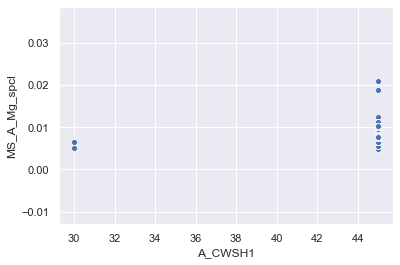

In [25]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="A_CWSH1", y="MS_A_Mg_spcl", data=dfComb)

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time",
...                      data=tips)

In [23]:
dfComb.columns

Index(['Cycle_Count', 'A_PU26A_CUR', 'A_PU27A_CUR', 'A_N2DRY', 'A_CWP_1',
       'A_CWP_2', 'A_FILT_T', 'A_MANF_P', 'A_CWSH1', 'A_CWSH2', 'A_PRESS1_t',
       'A_PRESS2_t', 'A_PU26A_OP', 'A_PU27A_OP', 'newdt', 'startdate',
       'enddate', 'MS_A_Pb_spcl', 'MS_A_Zn_spcl', 'MS_A_Cu_spcl',
       'MS_A_Ni_spcl', 'MS_A_Co_spcl', 'MS_A_Fe_spcl', 'MS_A_Mn_spcl',
       'MS_A_Cr_spcl', 'MS_A_Ca_spcl', 'MS_A_Si_spcl', 'MS_A_Al_spcl',
       'MS_A_Mg_spcl', 'MS_A_S_spcl', 'MS_A_moisture_spcl', 'MS_A_PS_10D_spcl',
       'MS_A_PS_50D_spcl', 'MS_A_PS_90D_spcl', 'MS_A_PS_mean_v_spcl',
       'MS_A_PS_stdev_spcl'],
      dtype='object')

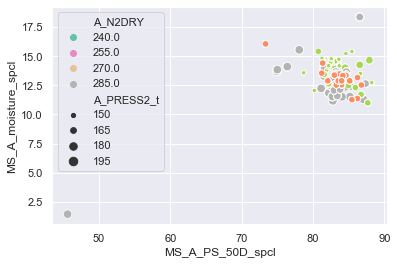

In [27]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="MS_A_PS_50D_spcl", y="MS_A_moisture_spcl",
                      hue="A_N2DRY", size="A_PRESS2_t",
                     palette="Set2",
                    data=dfComb)

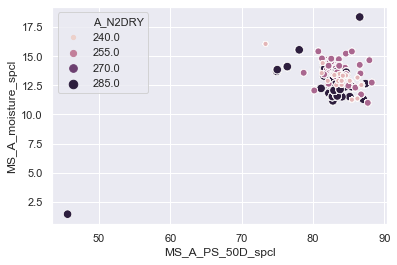

In [28]:
ax = sns.scatterplot(x="MS_A_PS_50D_spcl", y="MS_A_moisture_spcl", data=dfComb, hue='A_N2DRY', size='A_N2DRY')

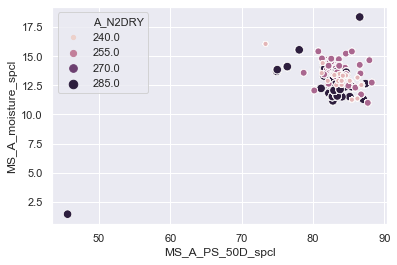

In [30]:
ax = sns.scatterplot(x="MS_A_PS_50D_spcl", y="MS_A_moisture_spcl", data=dfComb, hue='A_N2DRY', size='A_N2DRY')

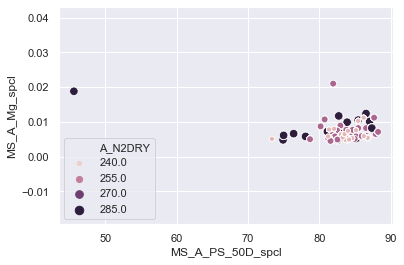

In [31]:
ax = sns.scatterplot(x="MS_A_PS_50D_spcl", y="MS_A_Mg_spcl", data=dfComb, hue='A_N2DRY', size='A_N2DRY')